
<div style="display: flex; background-color:  RGB(230,47,63);" >
<h1 style="margin: auto; padding: 30px; ">Etude de marché, La poule qui chante</h1>
</div>

## Partie 2 : Exploration des données. 

## Sommaire<a id='100'></a>

* [ I   : Importation des modules nécéssaire](#01) 
* [ II  : Importation des données généré dans la partie 1.](#02) 
* [ III : ACP.](#03) 
* [ IV  : Regroupement et sélection des pays (en utilisant les données brutes)](#04) 
* [ V   : LIste des Pays prioritaire](#05) 



### I : Importation des modules nécéssaire<a id='01'></a>
[retourner au sommaire](#100)

In [1]:
import numpy as np  #bibliothèque de calcul numérique


import pandas as pd #bibliothèque de manipulation de données


import matplotlib.pyplot as plt #bibliothèque de visualisation de données
import matplotlib.ticker as ticker  #bibliothèque de visualisation de données
import seaborn as sns   #bibliothèque de visualisation de données
import plotly.express as px #bibliothèque de visualisation de données


import statistics #bibliothèque de statistiques
import scipy.stats as stats #bibliothèque de statistiques
import statsmodels.api as sm #bibliothèque de statistiques


from sklearn.preprocessing import StandardScaler #bibliothèque de prétraitement de données
from sklearn.decomposition import PCA #bibliothèque de réduction de dimensions


from scipy.cluster.hierarchy import dendrogram, linkage #bibliothèque de clustering
from sklearn.cluster import KMeans #bibliothèque de clustering
from sklearn.metrics import silhouette_score #bibliothèque de clustering
from scipy.cluster.hierarchy import fcluster #bibliothèque de clustering


from deep_translator import GoogleTranslator #bibliothèque pour traduire des textes


### II : Importation des données généré dans la partie 1<a id='02'></a>
[retourner au sommaire](#100)

In [2]:
df=pd.read_csv("df_final.csv",delimiter=',') #importation du fichier csv
df.head()

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
0,Afghanistan,-2.80,1.95,29.0,28.0,NaN,1.903430e+04,5583.53,36296.113
1,Afrique du Sud,-0.28,4.96,514.0,1667.0,914.0,3.808514e+05,9063.96,57009.756
2,Albanie,0.38,5.14,38.0,13.0,2.0,1.301973e+04,1635.82,2884.169
3,Algérie,-0.92,4.67,2.0,275.0,NaN,1.700970e+05,2316.02,41389.189
4,Allemagne,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,632.77,82658.409


In [3]:
X = df.drop('pays', axis=1).dropna().values #on enlève la colonne pays et les valeurs manquantes

In [4]:
dfdrop=df.drop('pays', axis=1).dropna() #on enlève la colonne pays et les valeurs manquantes
dfdrop.head()

,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
1,-0.28,4.96,514.0,1667.0,914.0,3.808514e+05,9063.96,57009.756
2,0.38,5.14,38.0,13.0,2.0,1.301973e+04,1635.82,2884.169
4,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,632.77,82658.409
6,-0.33,1.94,277.0,42.0,9.0,1.221239e+05,6849.73,29816.766
7,0.75,5.71,7.0,0.0,2.0,1.467956e+03,6706.51,95.426


In [5]:
dfdrop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 1 to 186
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Political_Stability  109 non-null    float64
 1   indice_idi           109 non-null    float64
 2   importation_k/tons   109 non-null    float64
 3   production_k/tons    109 non-null    float64
 4   nb_etablissements    109 non-null    float64
 5   pib_million_usd      109 non-null    float64
 6   Distance (km)        109 non-null    float64
 7   pop_par_1k           109 non-null    float64
dtypes: float64(8)
memory usage: 7.7 KB


J'ai gardé un ficher avec des valeurs manquante en partant du principe qu'il peut être mis à jour dans le futur.

### III : ACP<a id='03'></a>
[retourner au sommaire](#100)

L'Analyse en Composantes Principales (ACP) est une technique statistique utilisée pour réduire la dimensionnalité d'un jeu de données tout en conservant autant que possible la variance présente dans les données d'origine. Voici les étapes principales de l'ACP :

Standardisation des données : Les données sont souvent standardisées pour avoir une moyenne de zéro et une variance de un.
Calcul de la matrice de covariance : Cette matrice montre comment les variables d'entrée varient ensemble.
Calcul des valeurs propres et des vecteurs propres : Les valeurs propres indiquent l'importance de chaque composante principale, tandis que les vecteurs propres indiquent la direction de ces composantes.
Sélection des composantes principales : Les composantes principales avec les plus grandes valeurs propres sont sélectionnées.
Transformation des données : Les données d'origine sont projetées sur les nouvelles composantes principales sélectionnées.
L'ACP est souvent utilisée pour la visualisation des données, la réduction de bruit, et la préparation des données pour d'autres algorithmes de machine learning.

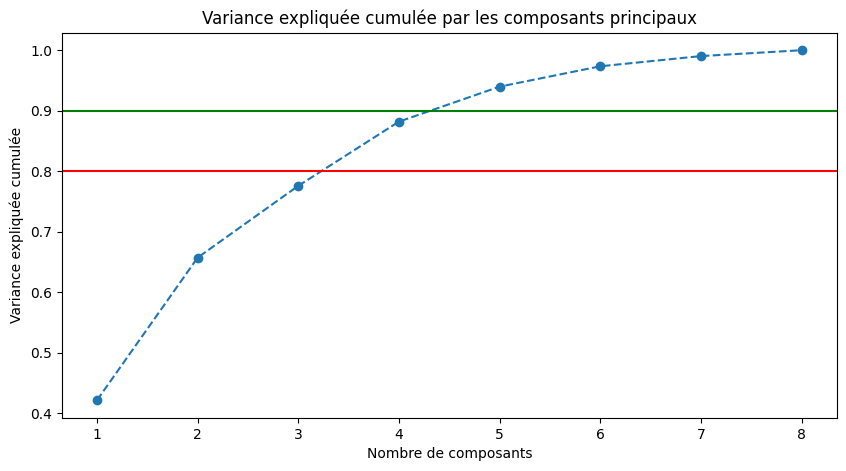

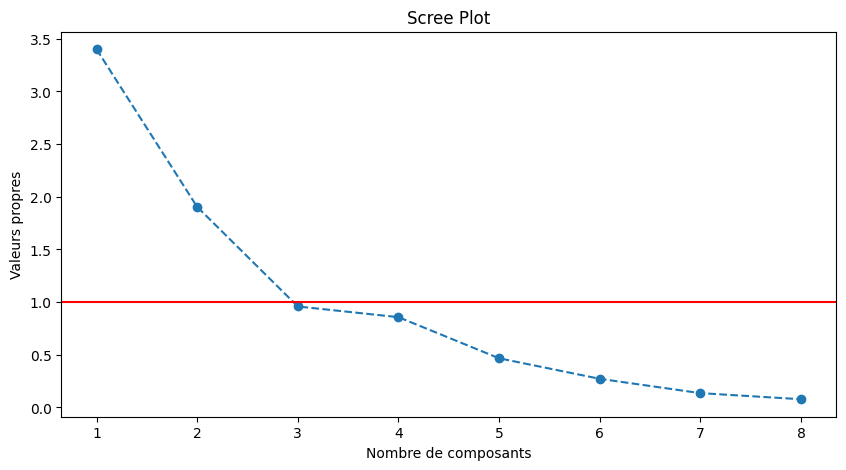

In [6]:


# Standardisation des données
X_std = StandardScaler().fit_transform(X)

# Application de l'ACP
pca = PCA().fit(X_std)

# Variance expliquée cumulée
variance_expliquee = np.cumsum(pca.explained_variance_ratio_)

# Plot de la variance expliquée cumulée
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(variance_expliquee) + 1), variance_expliquee, marker='o', linestyle='--')
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par les composants principaux')
plt.axhline(y=0.8, color='r', linestyle='-') #80% de variance
plt.axhline(y=0.9, color='g', linestyle='-') #90%  
plt.show()

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.xlabel('Nombre de composants')
plt.ylabel('Valeurs propres')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

In [7]:


# Initialisation de la mise à l'échelle
scaler = StandardScaler() 

# Selection des colonnes numérique pour la standartisation
numeric_cols = df.select_dtypes(include=['int', 'float']).columns 

# Application de la standartisation sur les colonnes numériques
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df_normalized = df_normalized.dropna()
df_normalized.head()


,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
1,Afrique du Sud,-0.240917,-0.065277,2.280627,0.377630,1.079418,-0.027965,0.769747,0.121274
2,Albanie,0.464474,0.015822,-0.276861,-0.285561,-0.271869,-0.235746,-1.160406,-0.249362
4,Allemagne,0.688916,1.480126,4.042929,0.316283,-0.018503,1.841790,-1.421042,0.296909
6,Angola,-0.294356,-1.425953,1.007256,-0.273933,-0.261497,-0.174116,0.194394,-0.064936
7,Antigua-et-Barbuda,0.859920,0.272639,-0.443420,-0.290774,-0.271869,-0.242272,0.157179,-0.268459


In [8]:
# Initialize PCA avec 4 composants principaux
pca = PCA(n_components=4)

# seulement les colonnes numériques
numeric_cols = df_normalized.select_dtypes(include=['float64']).columns

# Appliquer PCA sur les colonnes numériques
principal_components = pca.fit_transform(df_normalized[numeric_cols])

# Créer un DataFrame avec les composants principaux
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4'])

# Ajouter la colonne pays
df_pca['pays'] = df_normalized['pays'].values

df_pca.head()

,PC1,PC2,PC3,PC4,pays
0,0.911033,0.616746,2.029867,0.761747,Afrique du Sud
1,-0.874376,0.160448,-0.526154,-0.792788,Albanie
2,1.695741,3.627950,1.910166,-0.868381,Allemagne
3,-0.497413,-0.640524,1.453243,0.215434,Angola
4,-0.841460,0.010012,-0.557469,0.432055,Antigua-et-Barbuda


In [9]:
# Pourcentage de variance expliqué par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Affichage des résultats
for i, variance in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {variance * 100:.2f}%")

PC1: 50.74%
PC2: 17.49%
PC3: 10.83%
PC4: 8.92%


Ces pourcentages de variance expliquent combien de la variance totale des données d'origine est capturée par chaque composante principale (PC). Voici une explication pour chaque composante :

- **PC1: 50.74%** : La première composante principale capture 50.74% de la variance totale des données. Cela signifie que plus de la moitié de l'information présente dans les données d'origine est représentée par cette seule composante.
- **PC2: 17.49%** : La deuxième composante principale capture 17.49% de la variance totale. Ensemble, PC1 et PC2 capturent environ 68.23% de la variance totale.
- **PC3: 10.83%** : La troisième composante principale capture 10.83% de la variance totale. Avec PC1 et PC2, elles capturent environ 79.06% de la variance totale.
- **PC4: 8.92%** : La quatrième composante principale capture 8.92% de la variance totale. Avec les trois premières, elles capturent environ 87.98% de la variance totale.

En résumé, les quatre premières composantes principales capturent environ 88% de la variance totale des données, ce qui signifie qu'elles représentent bien les données d'origine avec une perte minimale d'information.

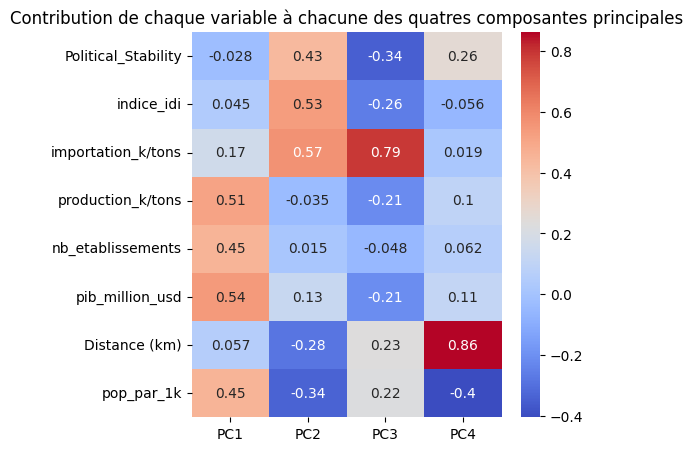

In [10]:
# Contribution de chaque variable à chacune des deux composantes principales
components = pd.DataFrame(pca.components_, columns=numeric_cols, index=['PC1', 'PC2','PC3','PC4'])

# Plot
plt.figure(figsize=(5, 5))
sns.heatmap(components.T, annot=True, cmap='coolwarm')
plt.title('Contribution de chaque variable à chacune des quatres composantes principales')
plt.show()

In [11]:
# Créer une figure avec des boxplots pour chaque composante principale
fig = px.box(df_pca, y=['PC1', 'PC2', 'PC3', 'PC4'], points="all")

# Afficher la figure
fig.show()

In [12]:
# Filtrer les lignes où n'importe quelle valeur dans les colonnes PC1, PC2, PC3 ou PC4 est supérieure à 10
df_pca_filtered = df_pca[(df_pca[['PC1', 'PC2', 'PC3', 'PC4']] > 10).any(axis=1)]

# Afficher les lignes filtrées
df_pca_filtered

,PC1,PC2,PC3,PC4,pays
21,15.595141,-1.660289,0.483396,-1.379968,"Chine, continentale"
106,13.567877,1.214135,-4.149950,2.057442,États-Unis


In [13]:
#Retirer les lignes 21 et 106 (USA et Chine)
df_pca2=df_pca.drop([21,106], axis='index')
df_pca2.head()

,PC1,PC2,PC3,PC4,pays
0,0.911033,0.616746,2.029867,0.761747,Afrique du Sud
1,-0.874376,0.160448,-0.526154,-0.792788,Albanie
2,1.695741,3.627950,1.910166,-0.868381,Allemagne
3,-0.497413,-0.640524,1.453243,0.215434,Angola
4,-0.841460,0.010012,-0.557469,0.432055,Antigua-et-Barbuda


In [14]:
# Créer une figure avec des boxplots pour chaque composante principale
fig = px.box(df_pca2, y=['PC1', 'PC2', 'PC3', 'PC4'], points="all")

# Afficher la figure
fig.show()

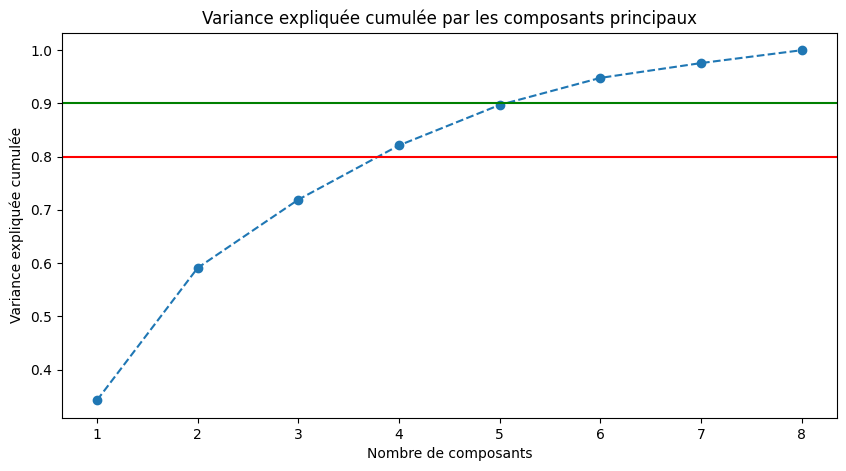

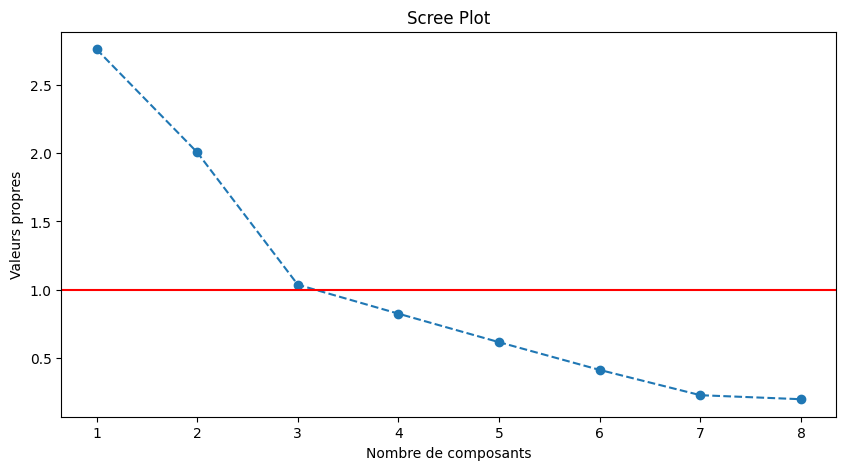

In [15]:
# On refait une ACP sans les deux outliers pour voir si le nombre de composants principaux est toujours 4 (sans doutes que oui)

df2 = df[~df['pays'].isin(['États-Unis', 'Chine, continentale'])]
X = df2.drop('pays', axis=1).dropna().values #on enlève la colonne pays et les valeurs manquantes
# Standardisation des données
X_std = StandardScaler().fit_transform(X)

# Application de l'ACP
pca = PCA().fit(X_std)

# Variance expliquée cumulée
variance_expliquee = np.cumsum(pca.explained_variance_ratio_)

# Plot de la variance expliquée cumulée
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(variance_expliquee) + 1), variance_expliquee, marker='o', linestyle='--')
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par les composants principaux')
plt.axhline(y=0.8, color='r', linestyle='-') #80% de variance
plt.axhline(y=0.9, color='g', linestyle='-') #90%  
plt.show()

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.xlabel('Nombre de composants')
plt.ylabel('Valeurs propres')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23256\2426093500.py:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



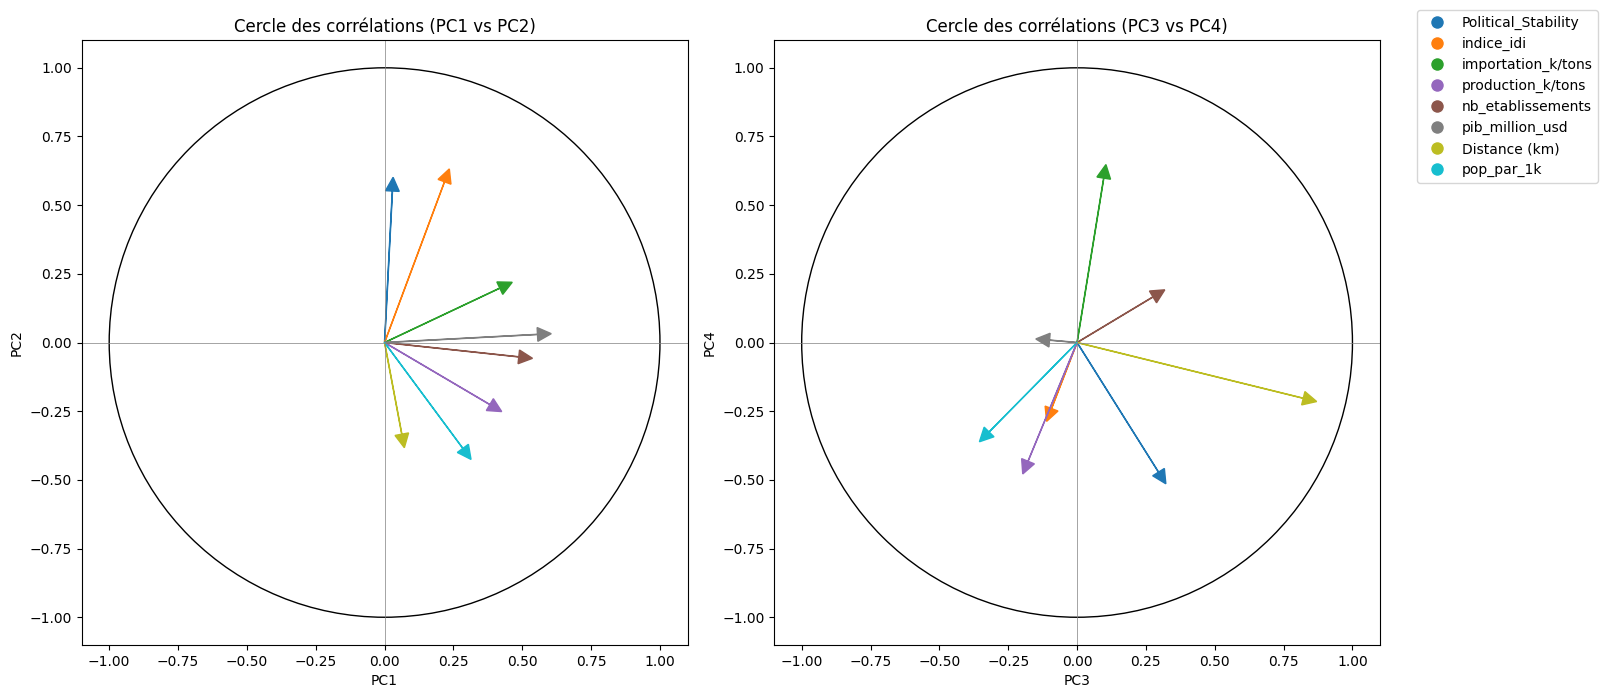

In [16]:
# Fonction pour dessiner un cercle
def draw_circle(ax, radius=1, **kwargs):
    circle = plt.Circle((0, 0), radius, edgecolor='black', facecolor='none', **kwargs)
    ax.add_patch(circle)

# Création de la figure et des axes
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Liste des composantes principales
components = ['PC1', 'PC2', 'PC3', 'PC4']

# Définir une liste de couleurs
colors = plt.cm.get_cmap('tab10', len(numeric_cols)).colors

# Dessiner les cercles de corrélation pour les deux paires de composantes principales
for i, (pc_x, pc_y) in enumerate([('PC1', 'PC2'), ('PC3', 'PC4')]):
    ax = axes[i]
    ax.axhline(0, color='grey', lw=0.5)
    ax.axvline(0, color='grey', lw=0.5)
    draw_circle(ax, radius=1)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel(pc_x)
    ax.set_ylabel(pc_y)
    ax.set_title(f'Cercle des corrélations ({pc_x} vs {pc_y})')

    # Ajouter les flèches pour chaque variable
    for j, color in enumerate(colors):
        ax.arrow(0, 0, pca.components_[components.index(pc_x), j], pca.components_[components.index(pc_y), j],
                 head_width=0.05, head_length=0.05, fc=color, ec=color)

# Ajouter la légende
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=col) 
                   for col, color in zip(numeric_cols, colors)]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

### Comment interpréter des cercles de corrélation

Les cercles de corrélation sont des graphiques utilisés en analyse en composantes principales (ACP) pour visualiser les relations entre les variables initiales et les composantes principales. Voici comment les interpréter :

1. **Axes des composantes principales** :
    - Les axes du graphique représentent les composantes principales (par exemple, PC1 et PC2). Chaque point sur le graphique correspond à une variable initiale projetée dans l'espace des composantes principales.

2. **Cercle de corrélation** :
    - Le cercle de corrélation a un rayon de 1. Les variables situées à l'intérieur du cercle sont celles qui sont bien représentées par les composantes principales. Les variables proches du bord du cercle sont mieux représentées que celles proches du centre.

3. **Longueur des vecteurs** :
    - La longueur d'un vecteur (flèche) représente la contribution de la variable à la composante principale. Plus le vecteur est long, plus la variable contribue à la composante principale.

4. **Angle entre les vecteurs** :
    - L'angle entre deux vecteurs indique la corrélation entre les variables correspondantes :
      - Un angle aigu (proche de 0°) indique une forte corrélation positive.
      - Un angle obtus (proche de 180°) indique une forte corrélation négative.
      - Un angle droit (90°) indique une absence de corrélation.

5. **Interprétation des composantes principales** :
    - Les variables qui sont proches les unes des autres sur le graphique sont corrélées et contribuent de manière similaire aux composantes principales.
    - Les variables opposées sur le graphique (angles de 180°) sont négativement corrélées.

6. **Utilisation pratique** :
    - Les cercles de corrélation aident à identifier les variables qui peuvent être regroupées ou réduites, facilitant ainsi l'interprétation des données et la réduction de la dimensionnalité.

En résumé, les cercles de corrélation sont un outil visuel puissant pour comprendre les relations entre les variables initiales et les composantes principales, aidant ainsi à interpréter les résultats de l'ACP.

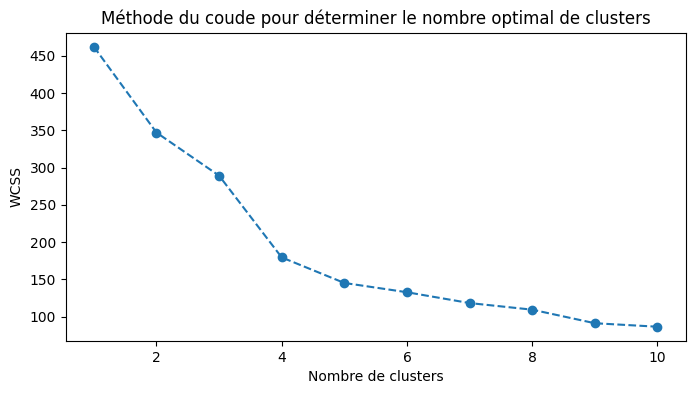

In [17]:
# Sélectionner les colonnes des composantes principales pour le clustering
X_pca = df_pca2[['PC1', 'PC2', 'PC3', 'PC4']].values

# Calculer le WCSS pour un nombre de clusters allant de 1 à 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

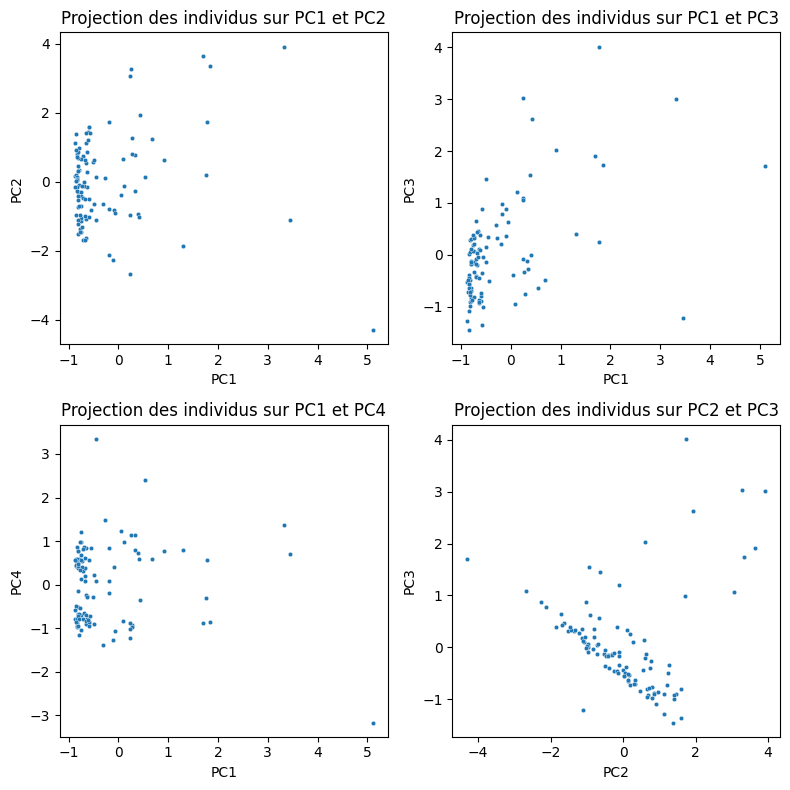

In [18]:
# Création de la figure et des axes
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Liste des paires de composantes principales à tracer
components_pairs = [('PC1', 'PC2'), ('PC1', 'PC3'), ('PC1', 'PC4'), ('PC2', 'PC3')]

# Tracer chaque paire de composantes principales
for (pc_x, pc_y), ax in zip(components_pairs, axes.flatten()):
    sns.scatterplot(data=df_pca2, x=pc_x, y=pc_y, ax=ax, legend=False, s=10)
    ax.set_title(f'Projection des individus sur {pc_x} et {pc_y}')
    ax.set_xlabel(pc_x)
    ax.set_ylabel(pc_y)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Comment interpréter la projection des individus

La projection des individus sur les composantes principales est une étape clé de l'Analyse en Composantes Principales (ACP). Voici comment l'interpréter :

1. **Axes des composantes principales** :
    - Les axes du graphique représentent les composantes principales (par exemple, PC1 et PC2). Chaque point sur le graphique correspond à un individu (ou une observation) projeté dans l'espace des composantes principales.

2. **Position des individus** :
    - Les individus proches les uns des autres sur le graphique sont similaires en termes des variables d'origine. Cela signifie qu'ils partagent des caractéristiques communes.
    - Les individus éloignés les uns des autres sont dissemblables.

3. **Contribution des composantes principales** :
    - Les composantes principales sont des combinaisons linéaires des variables d'origine qui maximisent la variance expliquée. La première composante principale (PC1) explique la plus grande part de la variance, suivie par la deuxième (PC2), et ainsi de suite.
    - Les individus situés à l'extrémité des axes des composantes principales sont ceux qui contribuent le plus à la variance expliquée par ces composantes.

4. **Clusters d'individus** :
    - Les groupes d'individus formant des clusters sur le graphique peuvent indiquer des sous-groupes naturels dans les données. Ces clusters peuvent être analysés pour identifier des segments ou des catégories spécifiques.

5. **Interprétation des axes** :
    - Les axes des composantes principales peuvent être interprétés en fonction des variables d'origine qui y contribuent le plus. Par exemple, si PC1 est fortement influencé par la variable "revenu", alors l'axe PC1 peut être interprété comme une mesure de revenu.

6. **Utilisation pratique** :
    - La projection des individus aide à visualiser les relations entre les observations et à identifier des patterns ou des tendances dans les données.
    - Elle est également utile pour détecter des outliers ou des observations atypiques.

En résumé, la projection des individus sur les composantes principales est un outil visuel puissant pour comprendre les similarités et les différences entre les observations, et pour identifier des structures sous-jacentes dans les données.

In [19]:
df_pca2

,PC1,PC2,PC3,PC4,pays
0,0.911033,0.616746,2.029867,0.761747,Afrique du Sud
1,-0.874376,0.160448,-0.526154,-0.792788,Albanie
2,1.695741,3.627950,1.910166,-0.868381,Allemagne
3,-0.497413,-0.640524,1.453243,0.215434,Angola
4,-0.841460,0.010012,-0.557469,0.432055,Antigua-et-Barbuda
...,...,...,...,...,...
103,0.113815,-0.115939,1.202015,0.982549,Vietnam
104,-0.801406,-1.103241,0.114104,0.475035,Zambie
105,-0.770181,-1.460181,0.385336,0.343103,Zimbabwe
107,-0.185716,1.719518,0.987249,0.090366,Émirats arabes unis


### IV : Regroupement et sélection des pays (en utilisant les données brutes).<a id='04'></a>
[retourner au sommaire](#100)

Classification Ascendante Hiérarchique (CAH)

La Classification Ascendante Hiérarchique (CAH) est une méthode de clustering qui vise à regrouper des objets similaires en clusters. Contrairement à d'autres méthodes de clustering comme K-means, la CAH ne nécessite pas de spécifier le nombre de clusters à l'avance. 

 Principe de la CAH

1. **Initialisation** : Chaque objet est initialement considéré comme un cluster individuel.
2. **Fusion** : Les deux clusters les plus proches sont fusionnés pour former un nouveau cluster. La proximité entre les clusters peut être mesurée de différentes manières (par exemple, la méthode de Ward, la distance moyenne, la distance maximale, etc.).
3. **Répétition** : Les étapes de fusion sont répétées jusqu'à ce qu'il ne reste plus qu'un seul cluster qui contient tous les objets.

 Représentation

Le résultat de la CAH est souvent représenté sous la forme d'un dendrogramme, qui est un diagramme en arbre montrant les relations de similarité entre les objets. Chaque nœud du dendrogramme représente une fusion de clusters, et la hauteur des nœuds indique la distance ou la dissimilarité entre les clusters fusionnés.

 Avantages

- **Pas de besoin de spécifier le nombre de clusters à l'avance** : La CAH permet de déterminer le nombre optimal de clusters en analysant le dendrogramme.
- **Flexibilité** : Différentes mesures de distance et méthodes de fusion peuvent être utilisées en fonction des besoins spécifiques de l'analyse.

 Inconvénients

- **Complexité computationnelle** : La CAH peut être coûteuse en termes de calcul pour de grands ensembles de données, car elle nécessite de calculer et de mettre à jour les distances entre tous les paires de clusters à chaque étape de fusion.
- **Sensibilité aux outliers** : Les objets atypiques peuvent influencer de manière significative la structure des clusters.

En résumé, la Classification Ascendante Hiérarchique est une méthode puissante et flexible pour le clustering, particulièrement utile lorsque le nombre de clusters n'est pas connu à l'avance.


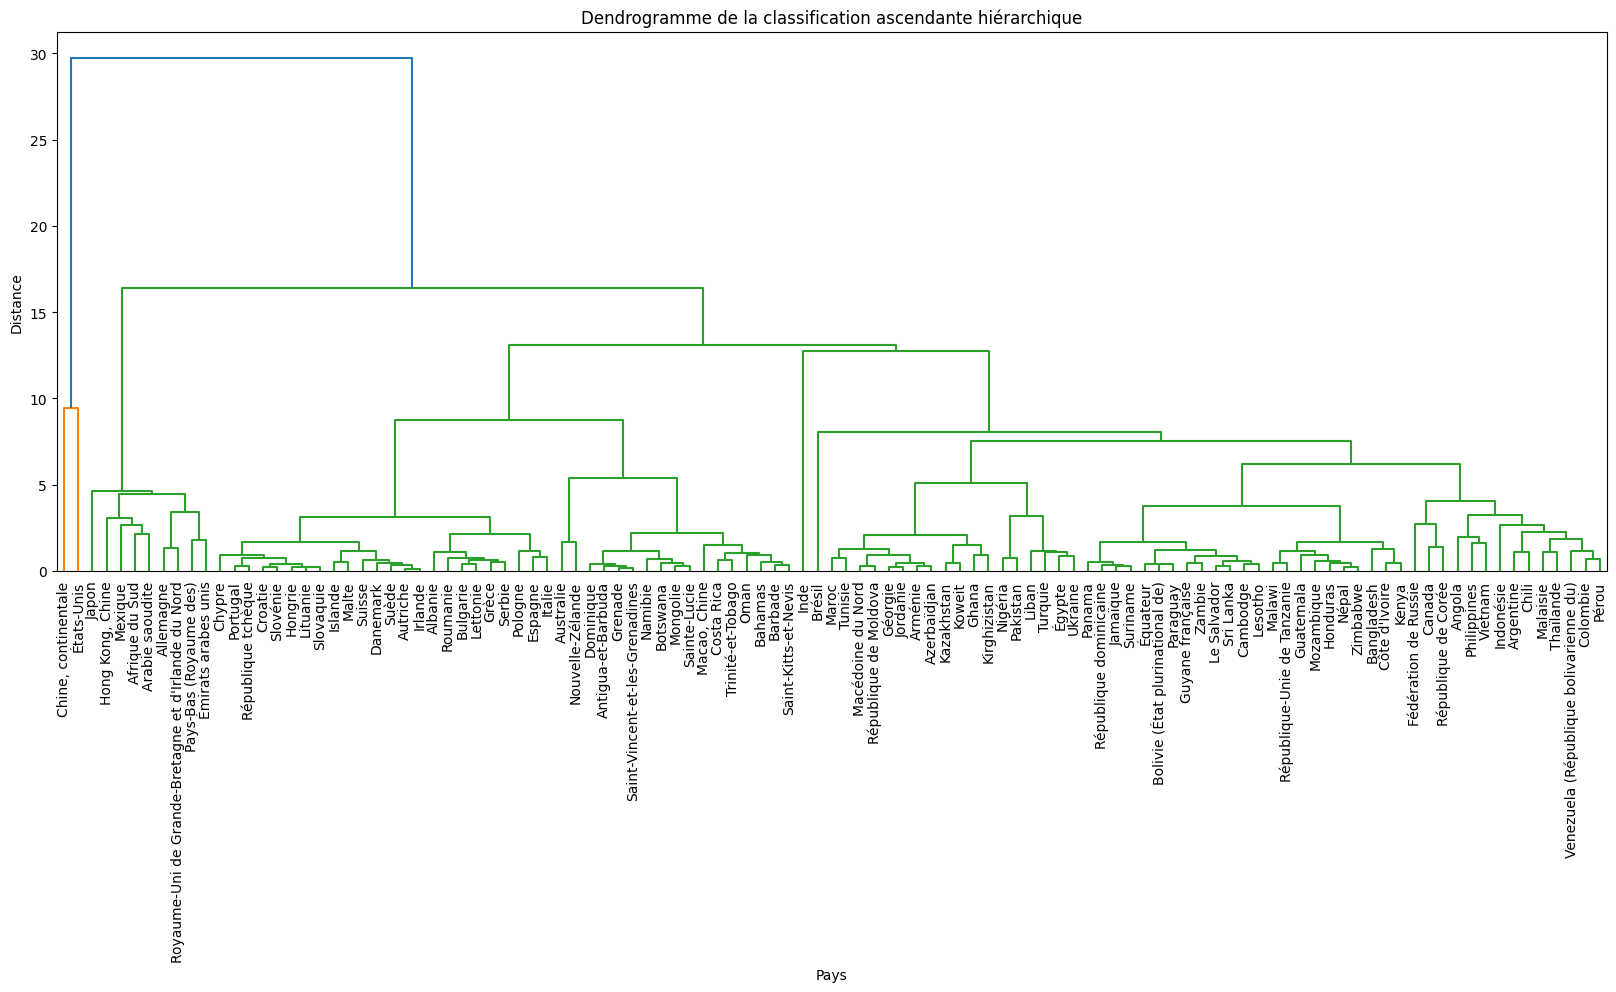

In [20]:


# Calcul des distances et création de la matrice de liaison
Z = linkage(df_normalized[numeric_cols], method='ward')

# Création du dendrogramme
plt.figure(figsize=(20, 7))
dendrogram(Z, labels=df_normalized['pays'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogramme de la classification ascendante hiérarchique')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()

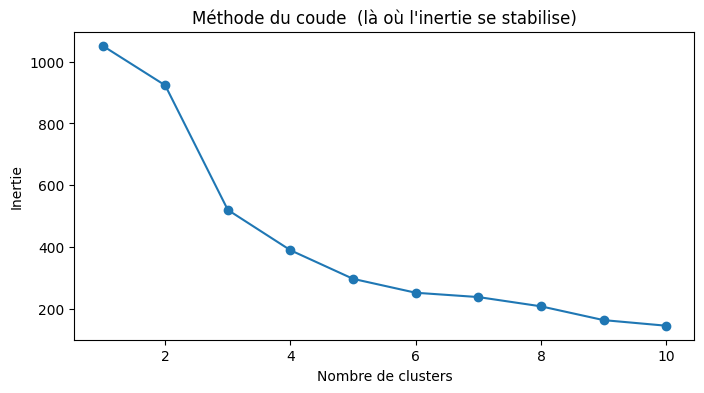

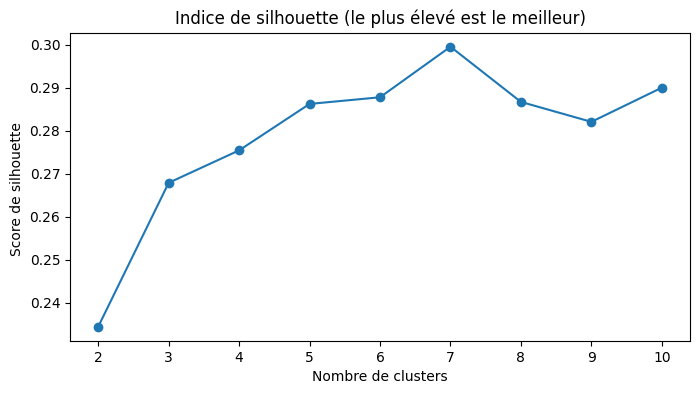

In [21]:
# Sélection des colonnes numériques pour le clustering
X = df_normalized[numeric_cols].values

# Méthode du coude
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude  (là où l\'inertie se stabilise)')
plt.show()

# Indice de silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette ')
plt.title('Indice de silhouette (le plus élevé est le meilleur)')
plt.show()

Ici on va utiliser l'indice de silhouette car il y a beacoup de pays.

In [22]:
# Initialise le nombre de clusters
nb_clusters = 7

# Effectue le clustering
clustering = fcluster(Z, t=nb_clusters, criterion='maxclust')
clustering

array([3, 4, 3, 6, 5, 3, 6, 6, 5, 4, 6, 5, 6, 5, 6, 5, 6, 4, 6, 6, 6, 1,
       3, 5, 4, 6, 6, 5, 4, 6, 4, 5, 6, 6, 4, 6, 6, 6, 5, 4, 6, 6, 6, 4,
       7, 6, 4, 4, 4, 6, 3, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 6, 6, 4, 6, 3,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 3, 6, 4, 4, 6, 4, 3, 6, 5, 5, 5,
       4, 4, 4, 6, 4, 6, 4, 6, 4, 6, 5, 6, 6, 6, 6, 6, 6, 6, 2, 3, 6],
      dtype=int32)

In [23]:
#ajouter le nombre de clusters dans le dataframe
df = df.dropna()
df['cluster_num'] = clustering
df.head()

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k,cluster_num
1,Afrique du Sud,-0.28,4.96,514.0,1667.0,914.0,3.808514e+05,9063.96,57009.756,3
2,Albanie,0.38,5.14,38.0,13.0,2.0,1.301973e+04,1635.82,2884.169,4
4,Allemagne,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,632.77,82658.409,3
6,Angola,-0.33,1.94,277.0,42.0,9.0,1.221239e+05,6849.73,29816.766,6
7,Antigua-et-Barbuda,0.75,5.71,7.0,0.0,2.0,1.467956e+03,6706.51,95.426,5


In [24]:
# Traduire les noms des pays dans le DataFrame
df_en = df.copy()
df_en['pays'] = df_en['pays'].apply(lambda x: GoogleTranslator(source='fr', target='en').translate(x) if pd.notnull(x) else x)

df_en.head()

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k,cluster_num
1,South Africa,-0.28,4.96,514.0,1667.0,914.0,3.808514e+05,9063.96,57009.756,3
2,Albania,0.38,5.14,38.0,13.0,2.0,1.301973e+04,1635.82,2884.169,4
4,Germany,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,632.77,82658.409,3
6,Angola,-0.33,1.94,277.0,42.0,9.0,1.221239e+05,6849.73,29816.766,6
7,Antigua and Barbuda,0.75,5.71,7.0,0.0,2.0,1.467956e+03,6706.51,95.426,5


In [25]:
df_enmap = df_en.copy()
df_enmap['cluster_num'] = df_enmap['cluster_num'].astype(str)

# Sort the DataFrame by cluster_num
df_enmap = df_enmap.sort_values(by='cluster_num')

# Créer une carte choroplèthe
fig = px.choropleth(df_enmap,
                    locations="pays",
                    locationmode="country names",
                    color="cluster_num",
                    hover_name="pays",
                    title="Clusters par pays")
fig.update_layout(width=800, height=500)  
# Afficher la carte
fig.show()

del df_enmap

In [26]:
# Créer un dictionnaire pour stocker les pays par numéro de cluster
pays_par_cluster = {}

# Parcourir chaque ligne du DataFrame
for index, row in df.iterrows():
    cluster_num = row['cluster_num']
    pays = row['pays']
    
    # Ajouter le pays à la liste correspondante dans le dictionnaire
    if cluster_num not in pays_par_cluster:
        pays_par_cluster[cluster_num] = []
    pays_par_cluster[cluster_num].append(pays)

# Afficher les pays par numéro de cluster
for cluster_num, pays_list in pays_par_cluster.items():
    print(f"Cluster {cluster_num}: {' | '.join(pays_list)}")

Cluster 3: Afrique du Sud | Allemagne | Arabie saoudite | Hong Kong, Chine | Japon | Mexique | Pays-Bas (Royaume des) | Royaume-Uni de Grande-Bretagne et d'Irlande du Nord | Émirats arabes unis
Cluster 4: Albanie | Autriche | Bulgarie | Chypre | Croatie | Danemark | Espagne | Grèce | Hongrie | Irlande | Islande | Italie | Lettonie | Lituanie | Malte | Pologne | Portugal | Roumanie | Serbie | Slovaquie | Slovénie | Suisse | Suède | République tchèque
Cluster 6: Angola | Argentine | Arménie | Azerbaïdjan | Bangladesh | Bolivie (État plurinational de) | Brésil | Cambodge | Canada | Chili | Colombie | République de Corée | Côte d'Ivoire | Égypte | Le Salvador | Fédération de Russie | Géorgie | Ghana | Guatemala | Guyane française | Honduras | Indonésie | Jamaïque | Jordanie | Kazakhstan | Kenya | Kirghizistan | Koweit | Lesotho | Liban | Macédoine du Nord | Malaisie | Malawi | Maroc | République de Moldova | Mozambique | Nigéria | Népal | Pakistan | Panama | Paraguay | Philippines | Pérou 

In [27]:
# Grouper les données par cluster et calculer les moyennes
df_cluster_means = df.drop(columns=['pays']).groupby('cluster_num').mean()

# Transposer le DataFrame pour avoir les clusters en colonnes
df_cluster_meansT=df_cluster_means.pivot_table(index='cluster_num', values=df_cluster_means.columns).T

df_cluster_meansT

cluster_num,1,2,3,4,5,6,7
Distance (km),7.852960e+03,7.520140e+03,5.449352e+03,1408.224167,8475.218824,6914.373750,7.173060e+03
Political_Stability,-2.300000e-01,3.400000e-01,3.133333e-01,0.701667,0.908235,-0.479643,-7.600000e-01
importation_k/tons,4.520000e+02,1.230000e+02,7.606667e+02,70.500000,18.529412,55.000000,0.000000e+00
indice_idi,5.600000e+00,8.180000e+00,7.396667e+00,7.412500,6.185294,4.647500,3.030000e+00
nb_etablissements,6.078000e+03,4.062000e+03,4.476667e+02,36.041667,57.647059,101.196429,3.950000e+02
pib_million_usd,1.231049e+07,1.961210e+07,1.683784e+06,315503.056441,111824.591449,265515.781407,2.624329e+06
pop_par_1k,1.421022e+06,3.250848e+05,5.839908e+04,11712.298875,2936.426471,44499.741893,1.338677e+06
production_k/tons,1.823600e+04,2.191400e+04,1.360778e+03,338.083333,102.058824,827.303571,3.545000e+03


In [28]:
# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the dataframe
df_cluster_means_T_normalized = pd.DataFrame(scaler.fit_transform(df_cluster_meansT), 
                                            index=df_cluster_meansT.index, 
                                            columns=df_cluster_meansT.columns)

# Display the normalized dataframe
df_cluster_means_T_normalized.head()

cluster_num,1,2,3,4,5,6,7
Distance (km),-0.425045,-0.384673,-0.385040,-0.382832,-0.190273,-0.379371,-0.534785
Political_Stability,-0.426994,-0.385835,-0.394875,-0.396396,-0.422195,-0.459288,-0.542621
importation_k/tons,-0.426882,-0.385816,-0.393503,-0.395723,-0.421712,-0.458647,-0.542620
indice_idi,-0.426993,-0.385834,-0.394862,-0.396331,-0.422050,-0.459229,-0.542617
nb_etablissements,-0.425486,-0.385207,-0.394068,-0.396055,-0.420642,-0.458113,-0.542189


In [29]:
# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the dataframe
df_cluster_means_normalized = pd.DataFrame(scaler.fit_transform(df_cluster_means), 
                                            index=df_cluster_means.index, 
                                            columns=df_cluster_means.columns)

# Display the normalized dataframe
df_cluster_means_normalized.head()

,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
cluster_num,,,,,,,,
1,-0.598822,-0.278246,0.906117,1.346130,1.976988,0.993122,0.656275,1.626174
2,0.395231,1.267011,-0.332844,1.772271,1.087583,2.023779,0.506045,-0.223436
3,0.348726,0.797844,2.068505,-0.609066,-0.506964,-0.506888,-0.428678,-0.673521
4,1.025961,0.807327,-0.530551,-0.727558,-0.688562,-0.700027,-2.252783,-0.752314
5,1.386207,0.072309,-0.726263,-0.754904,-0.679030,-0.728777,0.937153,-0.767125


In [30]:
df_cluster_means_normalized = df_cluster_means_normalized.reset_index()
df_cluster_means_normalized.head()

,cluster_num,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
0,1,-0.598822,-0.278246,0.906117,1.346130,1.976988,0.993122,0.656275,1.626174
1,2,0.395231,1.267011,-0.332844,1.772271,1.087583,2.023779,0.506045,-0.223436
2,3,0.348726,0.797844,2.068505,-0.609066,-0.506964,-0.506888,-0.428678,-0.673521
3,4,1.025961,0.807327,-0.530551,-0.727558,-0.688562,-0.700027,-2.252783,-0.752314
4,5,1.386207,0.072309,-0.726263,-0.754904,-0.679030,-0.728777,0.937153,-0.767125


In [31]:

# Créer un graphique de coordonnées parallèles
fig = px.parallel_coordinates(df_cluster_means_normalized,
                              color='cluster_num',
                              dimensions=df_cluster_means_normalized.columns,
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              title='Graphique de coordonnées parallèles des clusters normalisés')
fig.update_layout(width=1000, height=500)  
# Afficher le graphique
fig.show()

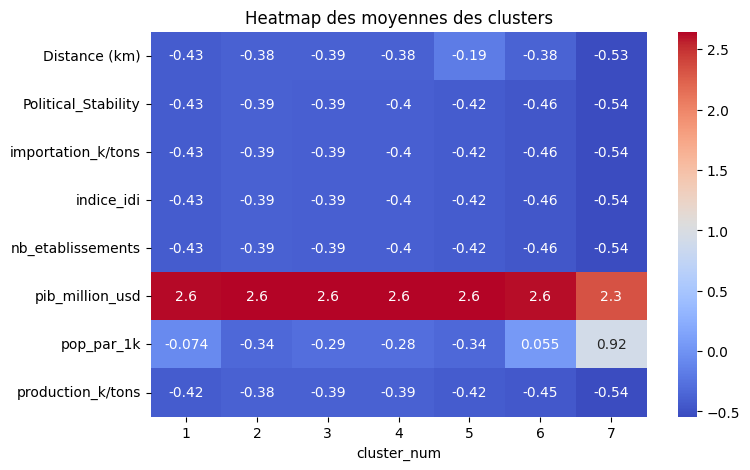

In [32]:
# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(df_cluster_means_T_normalized, annot=True, cmap='coolwarm')
plt.title('Heatmap des moyennes des clusters')
plt.show()

normaliser les données des heatmaps

J'ai décider d'affiner en retirant des variables et clusters pour voir si certaines étant vraiment trop fortes

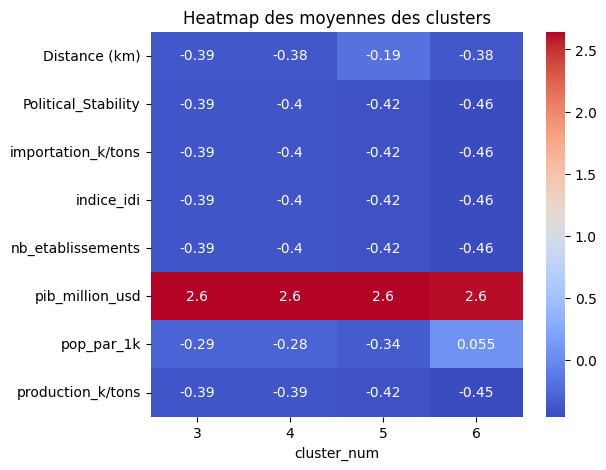

In [33]:
# Enlever les colonnes 1 et 2 de df_cluster_means
df_cluster_means_minus = df_cluster_means_T_normalized.drop(columns=[1, 2,7])

plt.figure(figsize=(6, 5))
sns.heatmap(df_cluster_means_minus, annot=True, cmap='coolwarm')
plt.title('Heatmap des moyennes des clusters')
plt.show()

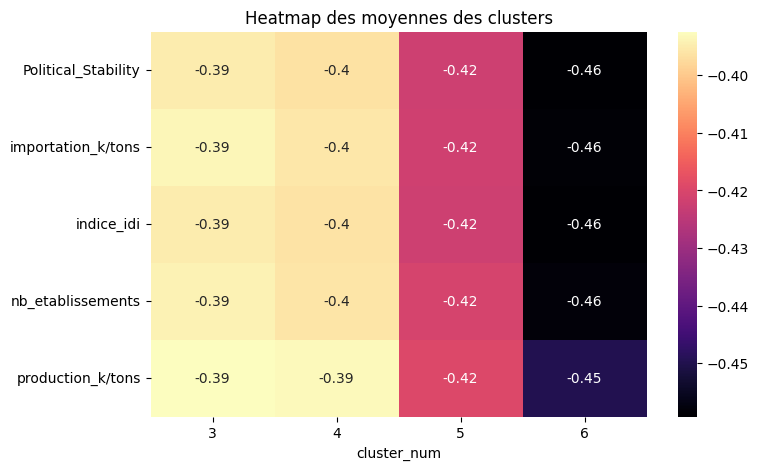

In [34]:
df_cluster_means_minus_lines = df_cluster_means_T_normalized.drop(['pop_par_1k', 'pib_million_usd','Distance (km)'], axis=0)
df_cluster_means_minus_lines=df_cluster_means_minus_lines.drop(columns=[1, 2,7])
plt.figure(figsize=(8, 5))
sns.heatmap(df_cluster_means_minus_lines, annot=True, cmap='magma')
plt.title('Heatmap des moyennes des clusters')
plt.show()

Stylisation du dataframe en heatmap

In [35]:
df_cluster_meansT.style.background_gradient(cmap='magma', axis='columns').format('{:.2f}')

cluster_num,1,2,3,4,5,6,7
Distance (km),7852.96,7520.14,5449.35,1408.22,8475.22,6914.37,7173.06
Political_Stability,-0.23,0.34,0.31,0.70,0.91,-0.48,-0.76
importation_k/tons,452.00,123.00,760.67,70.50,18.53,55.00,0.00
indice_idi,5.60,8.18,7.40,7.41,6.19,4.65,3.03
nb_etablissements,6078.00,4062.00,447.67,36.04,57.65,101.20,395.00
pib_million_usd,12310491.94,19612100.00,1683784.42,315503.06,111824.59,265515.78,2624329.04
pop_par_1k,1421021.79,325084.76,58399.08,11712.30,2936.43,44499.74,1338676.78
production_k/tons,18236.00,21914.00,1360.78,338.08,102.06,827.30,3545.00


In [36]:
df_cluster_means_3_4_5_6=df_cluster_meansT.drop(columns=[1,2,7])
df_cluster_means_3_4_5_6.style.background_gradient(cmap='magma', axis='columns').format('{:.2f}')

cluster_num,3,4,5,6
Distance (km),5449.35,1408.22,8475.22,6914.37
Political_Stability,0.31,0.70,0.91,-0.48
importation_k/tons,760.67,70.50,18.53,55.00
indice_idi,7.40,7.41,6.19,4.65
nb_etablissements,447.67,36.04,57.65,101.20
pib_million_usd,1683784.42,315503.06,111824.59,265515.78
pop_par_1k,58399.08,11712.30,2936.43,44499.74
production_k/tons,1360.78,338.08,102.06,827.30


on peut retirer les clusters qui ont une grande production (1 et 2 étant les USA et la chine).
le cluster 7 (inde) semble très intéressant à première vu, mais ils ne semble absoluement pas dépendre de l'importation. 
les autres cluster représentent plus de pays.
le cluster 6 représente énormément de pays.

le cluster 3, 4 et 5 semblent assez intéressant. 6 à une une stabilité politique assez basse.

Le même mais sans pivot.

In [37]:
df_cluster_means_3456=df_cluster_means.drop(index=[1,2,7]) #on retire donc les USA, la chine et l'inde
df_cluster_means_3456.style.background_gradient(cmap='magma', axis=0).format('{:.2f}')

,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
cluster_num,,,,,,,,
3,0.31,7.40,760.67,1360.78,447.67,1683784.42,5449.35,58399.08
4,0.70,7.41,70.50,338.08,36.04,315503.06,1408.22,11712.30
5,0.91,6.19,18.53,102.06,57.65,111824.59,8475.22,2936.43
6,-0.48,4.65,55.00,827.30,101.20,265515.78,6914.37,44499.74


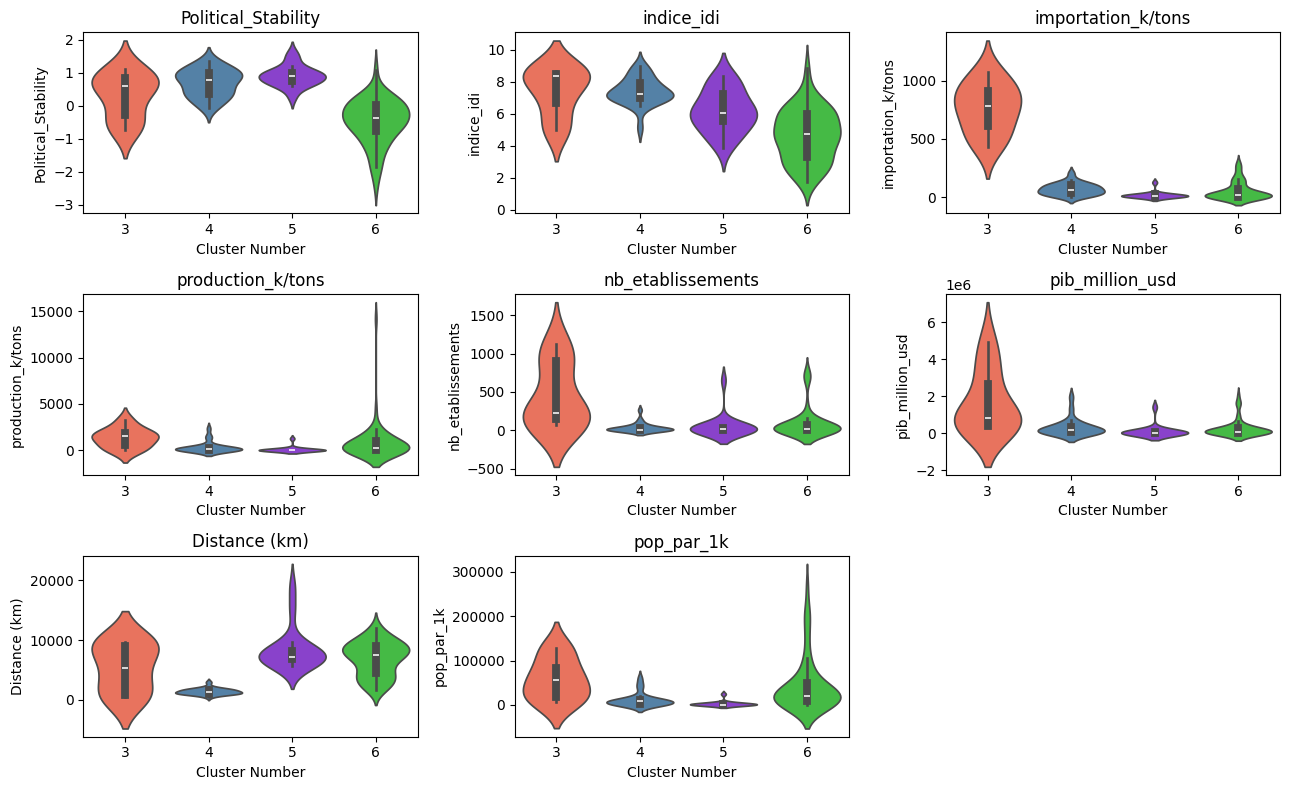

In [58]:
# Filtrer les clusters 1, 2 et 7
df_filtered = df[~df['cluster_num'].isin([1, 2, 7])]

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))

# Aplatir les axes pour une itération facile
axes = axes.flatten()

# Définir une liste de couleurs
colors = ['#FF6347', '#4682B4', '#8A2BE2', '#32CD32']

# Parcourir chaque colonne numérique et créer un violin plot
for i, col in enumerate(numeric_cols):
    sns.violinplot(x='cluster_num', y=col, data=df_filtered, ax=axes[i], hue='cluster_num', palette=colors, legend=False)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Cluster Number')
    axes[i].set_ylabel(col)

# Supprimer les sous-graphiques vides
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [39]:
# Filtrer les clusters 3 et 4
df_en_filtered = df_en[df_en['cluster_num'].isin([3,4,5,6])].copy()
df_en_filtered['cluster_num']=df_en_filtered['cluster_num'].astype(str)
df_en_filtered = df_en_filtered.sort_values(by='cluster_num')
# Créer une carte choroplèthe avec des couleurs spécifiques pour les clusters 3 et 4
fig = px.choropleth(df_en_filtered,
                    locations="pays",
                    locationmode="country names",
                    color="cluster_num",
                    hover_name="pays",
                    title="Clusters 3, 4, 5 et 6 par pays")

fig.update_layout(width=800, height=500)  
# Afficher la carte
fig.show()

del df_en_filtered

Le cluster 3 est vraiment le plus intéressant car même si il produit un peut plus que les autres, tous les autres paramètres sont sont satisfaisant

In [40]:
df_cluster_3 = df[df['cluster_num'] == 3].sort_values(by='production_k/tons', ascending=True) #visualisation du cluster 3
df_cluster_3

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k,cluster_num
38,"Hong Kong, Chine",0.83,8.61,907.0,24.0,75.0,3.412711e+05,9620.55,7306.322,3
185,Émirats arabes unis,0.62,7.21,433.0,48.0,151.0,3.905168e+05,5249.79,9487.203,3
8,Arabie saoudite,-0.58,6.67,722.0,616.0,220.0,7.149947e+05,4634.58,33101.179,3
133,Pays-Bas (Royaume des),0.92,8.49,608.0,1100.0,63.0,8.338696e+05,424.91,17021.347,3
4,Allemagne,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,632.77,82658.409,3
1,Afrique du Sud,-0.28,4.96,514.0,1667.0,914.0,3.808514e+05,9063.96,57009.756,3
142,Royaume-Uni de Grande-Bretagne et d'Irlande du...,0.33,8.65,779.0,1814.0,909.0,2.680148e+06,755.99,66727.461,3
87,Japon,1.11,8.43,1069.0,2215.0,1131.0,4.930837e+06,9605.46,127502.725,3
112,Mexique,-0.72,5.16,972.0,3249.0,393.0,1.190721e+06,9056.16,124777.324,3


In [41]:
df_cluster_4 = df[df['cluster_num'] == 4].sort_values(by='production_k/tons', ascending=True) #visualisation du cluster 4
df_cluster_4

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k,cluster_num
108,Malte,1.25,7.86,9.0,4.0,3.0,1.348455e+04,1746.43,437.933,4
83,Islande,1.35,8.98,2.0,10.0,8.0,2.472829e+04,2159.44,334.393,4
2,Albanie,0.38,5.14,38.0,13.0,2.0,1.301973e+04,1635.82,2884.169,4
41,Chypre,0.54,7.77,14.0,25.0,26.0,2.294654e+04,2948.14,1179.678,4
96,Lettonie,0.46,7.26,43.0,33.0,1.0,3.048381e+04,1734.95,1951.097,4
48,Croatie,0.69,7.24,24.0,61.0,8.0,5.644888e+04,1058.76,4182.857,4
155,Slovaquie,0.91,7.06,63.0,71.0,4.0,9.564997e+04,1249.99,5447.900,4
156,Slovénie,0.87,7.38,20.0,72.0,1.0,4.858910e+04,973.34,2076.394,4
151,Serbie,0.09,6.61,12.0,85.0,9.0,4.417908e+04,1483.34,8829.628,4
159,Suisse,1.26,8.74,51.0,91.0,4.0,6.952008e+05,494.88,8455.804,4


In [42]:
#Création d'un nouveau dataframe avec les clusters 3 et 4

df_cluster_3_4 = pd.concat([df_cluster_3, df_cluster_4])
df_cluster_3_4.drop(columns=['cluster_num'], inplace=True)
df_cluster_3_4.reset_index(drop=True, inplace=True)
df_cluster_3_4.head()

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
0,"Hong Kong, Chine",0.83,8.61,907.0,24.0,75.0,3.412711e+05,9620.55,7306.322
1,Émirats arabes unis,0.62,7.21,433.0,48.0,151.0,3.905168e+05,5249.79,9487.203
2,Arabie saoudite,-0.58,6.67,722.0,616.0,220.0,7.149947e+05,4634.58,33101.179
3,Pays-Bas (Royaume des),0.92,8.49,608.0,1100.0,63.0,8.338696e+05,424.91,17021.347
4,Allemagne,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,632.77,82658.409


Puis ont refait la même opération avec ce nouveau dataframe.

In [43]:
# Initialize the scaler
scaler = StandardScaler()

# Select only numeric columns for normalization
numeric_cols = df_cluster_3_4.select_dtypes(include=['float64', 'int']).columns

# Apply the scaler to the numeric columns
df_cluster_3_4_normalized = df_cluster_3_4.copy()
df_cluster_3_4_normalized[numeric_cols] = scaler.fit_transform(df_cluster_3_4[numeric_cols])

df_cluster_3_4_normalized.head()

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
0,"Hong Kong, Chine",0.463737,1.185123,1.980233,-0.707780,-0.261442,-0.316511,2.609347,-0.513336
1,Émirats arabes unis,0.047993,-0.195429,0.532339,-0.679135,0.009619,-0.271644,1.005337,-0.448014
2,Arabie saoudite,-2.327682,-0.727928,1.415127,-0.001194,0.255714,0.023983,0.779563,0.259266
3,Pays-Bas (Royaume des),0.641912,1.066790,1.066899,0.576489,-0.304241,0.132289,-0.765328,-0.222353
4,Allemagne,-0.011398,0.968179,1.781682,1.070622,0.088084,2.735248,-0.689046,1.743593


In [44]:
# Filtrer les clusters 3 et 4
df_en_filtered = df_en[df_en['cluster_num'].isin([3, 4])].copy()
df_en_filtered['cluster_num']=df_en_filtered['cluster_num'].astype(str)
# Créer une carte choroplèthe avec des couleurs spécifiques pour les clusters 3 et 4
fig = px.choropleth(df_en_filtered,
                    locations="pays",
                    locationmode="country names",
                    color="cluster_num",
                    hover_name="pays",
                    title="Clusters 3 et 4 par pays")

fig.update_layout(width=800, height=500)  

# Afficher la carte
fig.show()

del df_en_filtered

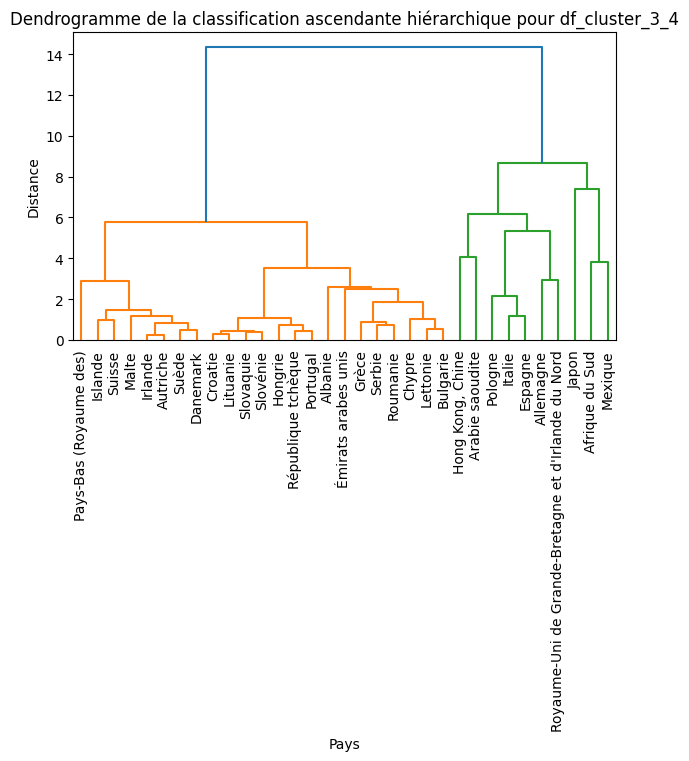

In [45]:
# Sélectionner les colonnes numériques pour le clustering
X_cluster_3_4 = df_cluster_3_4_normalized[numeric_cols].values

# Calcul des distances et création de la matrice de liaison
Z_cluster_3_4 = linkage(X_cluster_3_4, method='ward')

# Création du dendrogramme
plt.figure(figsize=(7, 4))
dendrogram(Z_cluster_3_4, labels=df_cluster_3_4['pays'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogramme de la classification ascendante hiérarchique pour df_cluster_3_4')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()

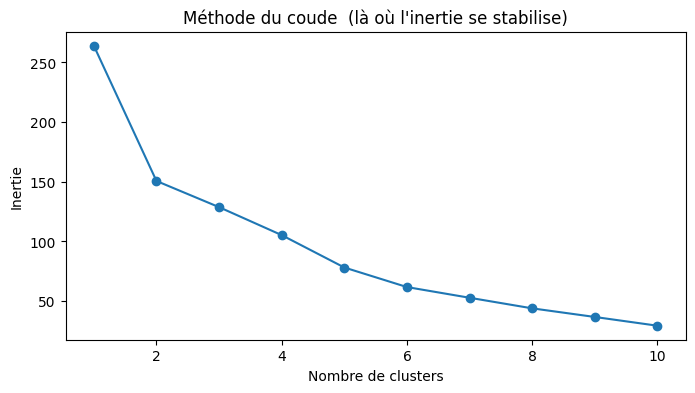

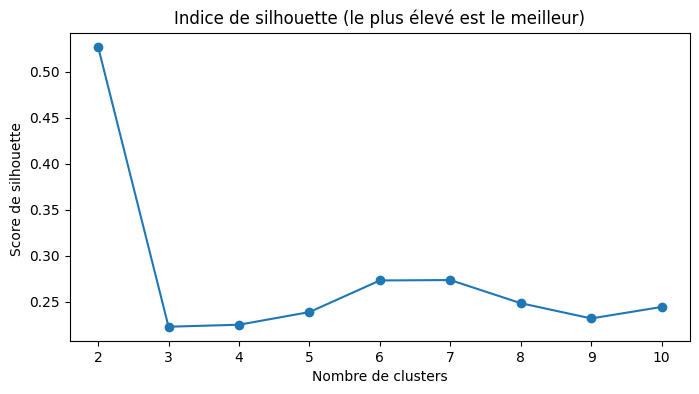

In [46]:
# Sélection des colonnes numériques pour le clustering
X = df_cluster_3_4_normalized[numeric_cols].values 

# Méthode du coude
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude  (là où l\'inertie se stabilise)')
plt.show()

# Indice de silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette ')
plt.title('Indice de silhouette (le plus élevé est le meilleur)')
plt.show()

In [47]:
# Initialise le nombre de clusters
nb_clusters = 2

# Generate clustering based on X_cluster_3_4
clustering = fcluster(Z_cluster_3_4, t=nb_clusters, criterion='maxclust')

# Assign the clustering results to df_cluster_3_4
df_cluster_3_4_normalized['cluster_num'] = clustering
df_cluster_3_4_normalized.style.background_gradient(cmap='magma', axis=0)

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k,cluster_num
0,"Hong Kong, Chine",0.463737,1.185123,1.980233,-0.707780,-0.261442,-0.316511,2.609347,-0.513336,2
1,Émirats arabes unis,0.047993,-0.195429,0.532339,-0.679135,0.009619,-0.271644,1.005337,-0.448014,1
2,Arabie saoudite,-2.327682,-0.727928,1.415127,-0.001194,0.255714,0.023983,0.779563,0.259266,2
3,Pays-Bas (Royaume des),0.641912,1.066790,1.066899,0.576489,-0.304241,0.132289,-0.765328,-0.222353,1
4,Allemagne,-0.011398,0.968179,1.781682,1.070622,0.088084,2.735248,-0.689046,1.743593,2
5,Afrique du Sud,-1.733763,-2.414173,0.779764,1.253237,2.730926,-0.280450,2.405086,0.975371,2
6,Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,-0.526128,1.224568,1.589240,1.428690,2.713093,1.814410,-0.643826,1.266433,2
7,Japon,1.018061,1.007624,2.475083,1.907307,3.504876,3.864986,2.603809,3.086760,2
8,Mexique,-2.604845,-2.216952,2.178784,3.141447,0.872733,0.457412,2.402223,3.005130,2
9,Malte,1.295223,0.445542,-0.762824,-0.731652,-0.518236,-0.615154,-0.280348,-0.719056,1


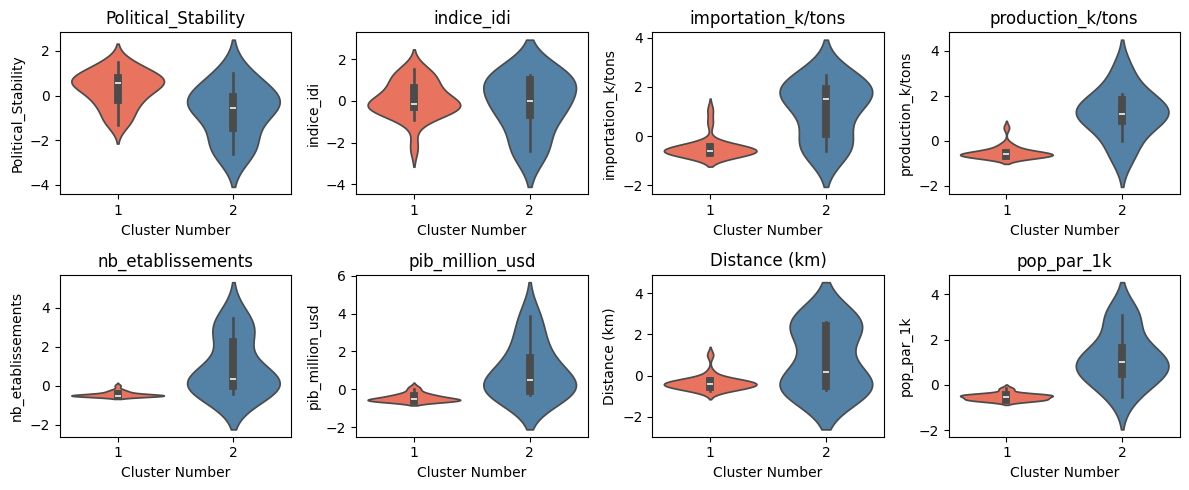

In [48]:
# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))

# Aplatir les axes pour une itération facile
axes = axes.flatten()

# Définir une liste de couleurs
colors = ['#FF6347', '#4682B4']

# Parcourir chaque colonne numérique et créer un violin plot
for i, col in enumerate(numeric_cols):
    sns.violinplot(x='cluster_num', y=col, data=df_cluster_3_4_normalized, ax=axes[i], hue='cluster_num',palette=colors,legend=False)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Cluster Number')
    axes[i].set_ylabel(col)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

## Liste des pays prioritaire 
### classés par la distance en kilomètre.<a id='05'></a>
[retourner au sommaire](#100)

In [49]:
# Initialise le nombre de clusters
nb_clusters = 2

# Generate clustering based on X_cluster_3_4
clustering = fcluster(Z_cluster_3_4, t=nb_clusters, criterion='maxclust')

# Assign the clustering results to df_cluster_3_4
df_cluster_3_4['cluster_num'] = clustering
df
df_cluster_2 = df_cluster_3_4[df_cluster_3_4['cluster_num'] == 2].sort_values(by='Distance (km)', ascending=True).reset_index(drop=True)
df_cluster_2.drop(columns=['cluster_num'], inplace=True)
df_cluster_2.style.background_gradient(cmap='magma', axis=0)

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
0,Allemagne,0.590000,8.390000,842.000000,1514.000000,173.000000,3690849.152518,632.770000,82658.409000
1,Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,0.330000,8.650000,779.000000,1814.000000,909.000000,2680148.052335,755.990000,66727.461000
2,Italie,0.310000,7.040000,97.000000,1315.000000,31.000000,1961796.197354,1056.460000,60673.701000
3,Espagne,0.280000,7.790000,205.000000,1515.000000,143.000000,1313245.330198,1203.920000,46647.428000
4,Pologne,0.520000,6.890000,55.000000,2351.000000,264.000000,524641.206562,1240.230000,37953.180000
5,Arabie saoudite,-0.580000,6.670000,722.000000,616.000000,220.000000,714994.694992,4634.580000,33101.179000
6,Mexique,-0.720000,5.160000,972.000000,3249.000000,393.000000,1190721.496877,9056.160000,124777.324000
7,Afrique du Sud,-0.280000,4.960000,514.000000,1667.000000,914.000000,380851.444101,9063.960000,57009.756000
8,Japon,1.110000,8.430000,1069.000000,2215.000000,1131.000000,4930837.369151,9605.460000,127502.725000
9,"Hong Kong, Chine",0.830000,8.610000,907.000000,24.000000,75.000000,341271.099990,9620.550000,7306.322000


In [50]:
# Translate the country names in df_cluster_2 to English
df_cluster_2['pays'] = df_cluster_2['pays'].apply(lambda x: GoogleTranslator(source='fr', target='en').translate(x) if pd.notnull(x) else x)

# Display the updated dataframe
df_cluster_2.head()

,pays,Political_Stability,indice_idi,importation_k/tons,production_k/tons,nb_etablissements,pib_million_usd,Distance (km),pop_par_1k
0,Germany,0.59,8.39,842.0,1514.0,173.0,3.690849e+06,632.77,82658.409
1,United Kingdom of Great Britain and Northern I...,0.33,8.65,779.0,1814.0,909.0,2.680148e+06,755.99,66727.461
2,Italy,0.31,7.04,97.0,1315.0,31.0,1.961796e+06,1056.46,60673.701
3,Spain,0.28,7.79,205.0,1515.0,143.0,1.313245e+06,1203.92,46647.428
4,Poland,0.52,6.89,55.0,2351.0,264.0,5.246412e+05,1240.23,37953.180


In [51]:
# Créer une bubble map avec changement de couleur en fonction de la taille de la bulle
fig = px.scatter_geo(df_cluster_2,
                     locations="pays",
                     locationmode="country names",
                     size="importation_k/tons",  # peux changer de variable : Political_Stability , Distance (km) , production_k/tons etc...
                     color="importation_k/tons",#idem
                     hover_name="pays",
                     title="Importation en k/tons par pays",
                     color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(width=800, height=500)  
# Afficher la carte
fig.show()

La première moitié de la liste sont des pays très proche de la france et membre de l'UE (mis à part le Royaume unis).

La seconde moitié représente des pays asse développés dans différentes ones du globle.
Hong Kong et le Japon qui sont considéré comme part de l'asie de l'est, l'Arabie Saoudite dans le bassin arabe, le Mexique en amérique centrale et l'Afrique du sud, en Afrique du sud.

faire une représentation de spclusters sur une carte
